# Final Project Submission

Please fill out:
* Student name: <strong>Michael Mahoney</strong>
* Student pace: self paced / <strong>part time</strong> / full time
* Scheduled project review date/time: 
* Instructor name: <strong>James Irving</strong>
* Blog post URL:


# Project Overview
## Abstract
## Scpoe
The purpose of this project is to explore the King County Housing data to discover what variables are the best predictors of sale price. The following elements will be considered to be the primary scope of the project.

* Question 1: 
* Question 2: 
* Question 3: 

## Methodology: CRISP-DM
* Investigating the existing data
* Cleaning data by discarding or replacing null and/or filler data
* Analysis of the independant variables
* Preforming a linear regression analysis of the data and revising as needed

# Package Dependancies
* Numpy
* Pandas
* Matplotlib.pyplot
* scipy.stats
* Seaborn
* statsmodels
* scikit-learn

# Baseline Data-Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels
from statsmodels.formula.api import ols
import datetime
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scripts


In [2]:
# Toggle the following line to show all columns
pd.set_option('display.max_columns', None)

## First Look

In [3]:
# Import the data set for pre-processing and save it to a variable
dfInitial = pd.DataFrame(pd.read_csv('kc_house_data.csv'))
print(f'The DataFrame is of dimensions {dfInitial.shape} \n')
display(dfInitial.head())
display(dfInitial.info())

The DataFrame is of dimensions (21597, 21) 



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

From our info list we see that many of the data types have been imput incorrectly. We will now go through reassign the correct data types for use in the regression model.

## Changing Column Data Types

### Date-times

The date column appears to be the only datetime column. It is currectly assigned to dtype 'object' which is the string type in pandas. We use the following code to change this column to the correct type.

In [4]:
dfInitial['date'] = pd.to_datetime(dfInitial['date'])

We check to make sure the conversion was successful

In [5]:
dfInitial.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Numerical

There also only appear to be one mis-typed numerical column, being 'sqft_basement'. Because the column has null values encoded as the question mark symbol '?', we will replace this with the none type and address this later.

In [6]:
dfInitial['sqft_basement'].loc[dfInitial['sqft_basement'] == '?'] = None
dfInitial['sqft_basement'].isna().sum()
dfInitial['sqft_basement'] = pd.to_numeric(dfInitial['sqft_basement'])
dfInitial.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Categorical

We now look to re-assign to categories. When looking at our columns, there are several instances of categories being coded as numerical columns. From the descrtiption of our columns as provided in the repository the following columns are better encoded as categories: 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'bedrooms', 'bathrooms' and 'floors'. Pandas has a specific dtype called 'category' for this type of encoding.

In [7]:
# We are going to do something special to the 'yr_renovated' column to change its type to  first
dfInitial['yr_renovated'] = dfInitial['yr_renovated'].apply(lambda x: int(x) if x == None else x)
dfInitial['yr_renovated'] = dfInitial['yr_renovated'].astype('object')
dfInitial['view'] = dfInitial['view'].apply(lambda x: int(x) if x == None else x)
dfInitial['view'] = dfInitial['view'].astype('object')
catCols = ['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
dfInitial[catCols] = dfInitial[catCols].astype('category')
dfInitial.info()
dfInitial['yr_renovated']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  category      
 9   view           21534 non-null  category      
 10  condition      21597 non-null  category      
 11  grade          21597 non-null  category      
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  category      
 15  yr_renovated   1775

0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: category
Categories (70, float64): [0.0, 1934.0, 1940.0, 1944.0, ..., 2012.0, 2013.0, 2014.0, 2015.0]

With everything typed correctly we now move on to cleaning the data

## Detecting and Managing Null Values

### Finding placeholder values

Place holder values are entries of non-null data that are meant to serve as null data. As we've seen, there has already been one instance of place holder values in the sqft_basement column that we changed to null in order to cast the column as a new data type. We now formally go through all columns and determine the method for dealing with these values (which cannot be present for regression techniques). A common way to find these values is to map the usage of values in each column. 

In [8]:
for x in dfInitial.columns:
    display(dfInitial[x].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

0.0    19075
1.0      146
Name: waterfront, dtype: int64

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1954.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 70, dtype: int64

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
           ..
47.2785     1
47.4162     1
47.3870     1
47.2313     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751, dtype: int64

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

Somewhat remarkably, it looks like the 'sqft_basement' column was the only one to contain placeholder values. 

### Null Values

The first question to answer is whether we should drop any columns outright based on missing data. We do a quick proportionality test for the null values as follows.

In [9]:
dfInitial.isna().sum()/len(dfInitial['id'])

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.021021
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

Normally, for a column to be missing more than 10% of the data is worth considering throwing out. However, for our baseline model we will keep all columns in and decide if they warrant removal after the initial round of regression. As a further baseline measure we will fill these null values with the average for numerical data and the median for categorical data.

#### Numerical Null Values

The numerical columns with null values are 'sqft_basement'. We proceed by finding the mean of the non-null data and using this value as a fill in. 

In [10]:
scripts.fillNull(dfInitial, ['sqft_basement'], showInfo = True)        


'Column sqft_basement now has 0 null values'

'The mean of column sqft_basement = 291.851723974838'

0.000000       12826
291.851724       454
600.000000       217
500.000000       209
700.000000       208
               ...  
588.000000         1
1920.000000        1
2390.000000        1
1245.000000        1
1135.000000        1
Name: sqft_basement, Length: 304, dtype: int64

#### Null categorical data

The catagorical columns with nulls are: 'waterfront', 'view' and 'yr_renovated'. For the baseline model we will make the null values into their own column.

In [11]:
scripts.fillNull(dfInitial, ['waterfront', 'view','yr_renovated'],numericalData = False, showInfo = True)

'Column waterfront now has 0 null values'

'The mean of column waterfront = Null'

0.0     19075
Null     2376
1.0       146
Name: waterfront, dtype: int64

'Column view now has 0 null values'

'The mean of column view = Null'

0.0     19422
2.0       957
3.0       508
1.0       330
4.0       317
Null       63
Name: view, dtype: int64

'Column yr_renovated now has 0 null values'

'The mean of column yr_renovated = Null'

0.0       17011
Null       3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1948.0        1
1946.0        1
1944.0        1
1934.0        1
1971.0        1
Name: yr_renovated, Length: 71, dtype: int64

## Removing Duplicated

Now that all null values have been dealt with we will do one final processing step to make sure there aren't any duplicates that will skew our regression analysis. 

In [12]:
dfInitial.duplicated().sum()

0

With no duplicated entries we create a copy of the processed data for the regression steps.

In [13]:
dfPreprocessed = dfInitial.copy()
dfPreprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  category      
 9   view           21597 non-null  category      
 10  condition      21597 non-null  category      
 11  grade          21597 non-null  category      
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  category      
 15  yr_renovated   2159

## Removing Outliers

Our data is almost clean enough to begin modeling. The final step will be to remove outliers that skewing our data and will lead to less accurate models. We will begin with the approach of dropping all data points that lie 3-standard deviations ourside of the mean for each of the numeric columns. For categorical we will use the value counts method to determine the proportionality of data and drop things accordingly. 

In [14]:
def dropNumericOutliers(df, throwAwayThreshold = .05):
    outlierIndicies = []
    try:
        dfNumeric = df.select_dtypes(['int64','float64']).drop(columns = 'id')
    except:
        dfNumeric = df.select_dtypes(['int64','float64'])
    for x in dfNumeric.columns:
        mean = dfNumeric[x].mean()
        std = dfNumeric[x].std()
        indecies = dfNumeric.loc[(dfNumeric[x] < mean - 3*std) | (dfNumeric[x] > mean + 3*std)].index
        print(indecies)
        for index in indecies:
            if index in outlierIndicies:
                pass
            else:
                outlierIndicies.append(index)
    print(outlierIndicies)
    print('\n')
    print(f'Combined all the outliers make up {dfNumeric.shape[0]/len(outlierIndicies)}% of the data')
    
    return df.drop(index = outlierIndicies)
        
    

In [15]:
dfPreprocessed = dropNumericOutliers(dfPreprocessed)

Int64Index([   21,   153,   246,   269,   282,   300,   312,   518,   540,
              556,
            ...
            21367, 21451, 21457, 21469, 21490, 21498, 21514, 21524, 21552,
            21560],
           dtype='int64', length=406)
Int64Index([  556,  1134,  1239,  1658,  3717,  4020,  4031,  4063,  4092,
             4231,  4713,  4756,  4863,  6073,  6168,  7016,  7184,  8113,
             8507,  8537,  8620,  8748,  9068,  9123,  9443,  9650,  9723,
            10264, 10775, 10946, 12005, 12593, 12596, 12752, 12764, 12872,
            13107, 13301, 14017, 14188, 14901, 15008, 15056, 15147, 15232,
            15507, 15656, 15737, 15856, 16299, 16722, 16830, 17221, 17321,
            18428, 18445, 18462, 18808, 18960, 19239, 19287, 19312],
           dtype='int64')
Int64Index([    5,   270,   300,   450,   527,  1054,  1099,  1121,  1161,
             1162,
            ...
            20968, 21034, 21132, 21170, 21267, 21328, 21478, 21490, 21535,
            21560],
       

# Building The Baseline Model

## Numerical Data

### Validating Assumptions of Linear Regression

We begin the modeling process with our numerical data. As this project is concerned with linear regression, our first question to answer is whether the data meets the assumptions of a linear model.

#### Linearity

In [16]:
# sns.pairplot(dfPreprocessed)

This are looking linear in general with the exception of lat/long, zip, id, and neighboring lot data. We will proceed with the baseline model as though the linear assumption is satisfied. Subsequent models will take a more serious approach. 

#### Normality Of Numerical Data

In [17]:
# stats.normaltest()

'NormaltestResult(statistic=29.274993469121295, pvalue=4.395577476155137e-07)'

'NormaltestResult(statistic=2581.125670653345, pvalue=0.0)'

'NormaltestResult(statistic=1854.0313825933583, pvalue=0.0)'

'NormaltestResult(statistic=319.36599892346345, pvalue=4.4725425401657096e-70)'

'NormaltestResult(statistic=851.4386036284703, pvalue=1.2955565739625712e-185)'

'NormaltestResult(statistic=132471.2886831552, pvalue=0.0)'

'NormaltestResult(statistic=505.9062114592422, pvalue=1.392714192586436e-110)'

'NormaltestResult(statistic=3455.398620413306, pvalue=0.0)'

'NormaltestResult(statistic=1850.616253519906, pvalue=0.0)'

'NormaltestResult(statistic=1267.935670197433, pvalue=4.691022461940216e-276)'

'NormaltestResult(statistic=211.3851673049251, pvalue=1.253990197586564e-46)'

'NormaltestResult(statistic=922.781167223527, pvalue=4.174606406805561e-201)'

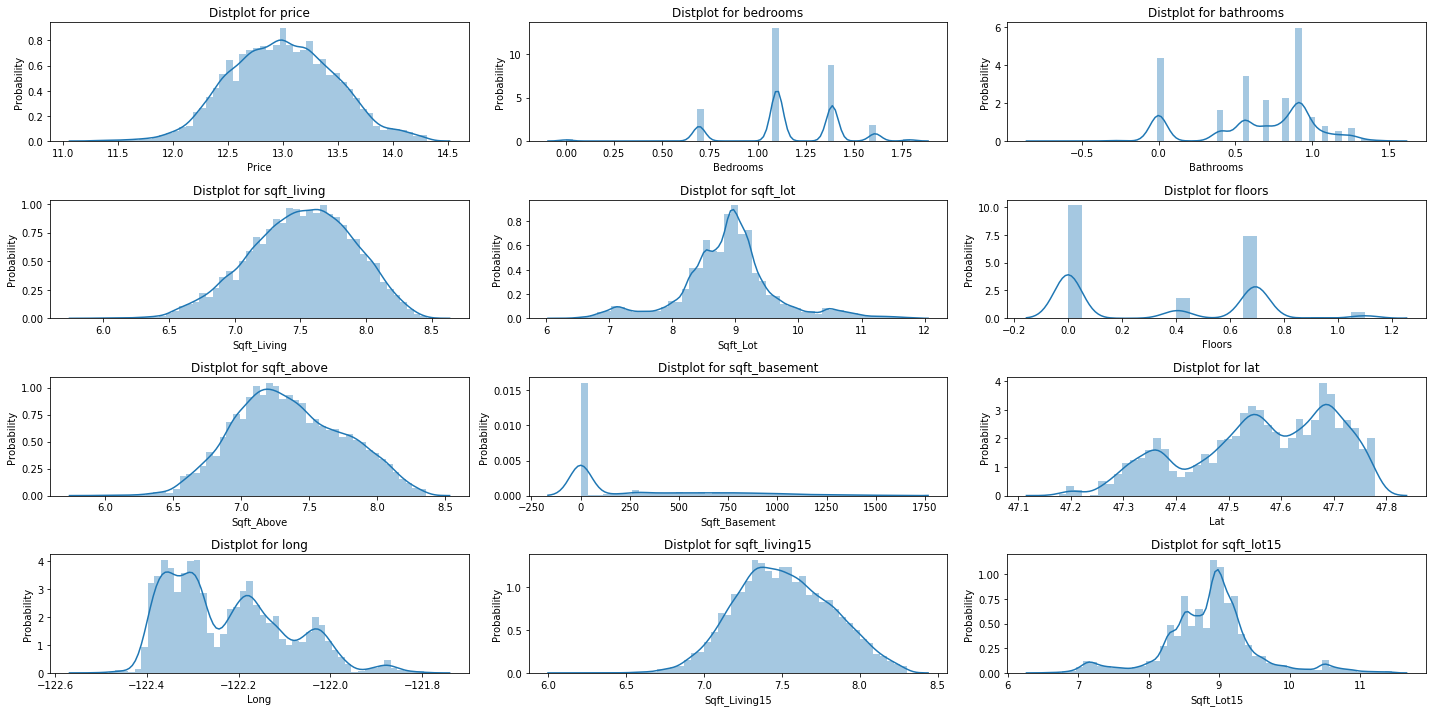

In [18]:
dfNumeric = dfPreprocessed.select_dtypes(['int64','float64']).drop(labels = 'id', axis = 1)
locColumns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_lot', 'sqft_lot15', 'floors']
dfNumeric[locColumns] = dfNumeric[locColumns].applymap(lambda x: np.log(x))
plt.figure(figsize=(20,10))
plotNum = 1
for x in dfNumeric.columns:
    axes = plt.subplot(4, 3, plotNum)
    sns.distplot(a = dfNumeric[x], ax = axes, norm_hist = True)
    plotNum += 1
    plt.title(f'Distplot for {x}')
    plt.xlabel(f'{x.title()}')
    plt.ylabel(f'Probability')
    display(f'{stats.normaltest(dfNumeric[x])}')
plt.tight_layout()

Alas, according to a rigorous test for normality, all numerical columns fail. While normal data would be beneficial, what we really need are for residuals to be normal. Note: For the baseline model we will not be preforming log transforms.

#### Normality Of Residuals

In [19]:
# dfNumeric = dfPreprocessed.select_dtypes(['int64','float64']).drop(labels = 'id', axis = 1)
# plt.figure(figsize=(20,10))
# plotNum = 1
# for x in dfNumeric.columns:
#     axes = plt.subplot(4, 3, plotNum)
#     mean = dfNumeric[x].mean()
#     data = dfNumeric[x] - mean
# #     display(mean)
#     sns.distplot(a = data, ax = axes, norm_hist = True)
#     plotNum += 1
#     plt.title(f'Distplot for {x}')
#     plt.xlabel(f'{x.title()}')
#     plt.ylabel(f'Probability')
# #     display(f'{stats.normaltest(dfNumeric[x])}')
# plt.tight_layout()

## Standardizing Data

In order for all our independent variable to be clearly represented in the analysis they must be normalized. For the baseline model we will use standard normalization.

In [20]:
for x in dfNumeric.columns:
    mean = dfNumeric[x].mean()
    std = dfNumeric[x].std()
    dfNumeric[x] = dfNumeric[x].apply(lambda x: (x - mean)/std)
dfNumeric.head()
dfNumeric.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

## Encoding Categorical Data

Moving on to our baseline model we need to encode our categorical data. The approach we will be using in one-hot encoding.

In [21]:
dfcatCols = dfPreprocessed.select_dtypes('category')
encodedCatCols = pd.get_dummies(dfcatCols, drop_first = True)
dfFinal = pd.concat([dfNumeric,encodedCatCols], axis = 1)
dfFinal.info()
dfFinal['grade_6']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20033 entries, 0 to 21596
Columns: 287 entries, price to zipcode_98199
dtypes: float64(12), uint8(275)
memory usage: 7.2 MB


0        0
1        0
2        1
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: grade_6, Length: 20033, dtype: uint8

## Treating Multi-Coolinearity

With all columns seperated out we now will go through the process of removing coolinear columns. For the purposese of this investigation we will use a correlation value of .65 as the threshold of what columns we should remove for being coolinear. 

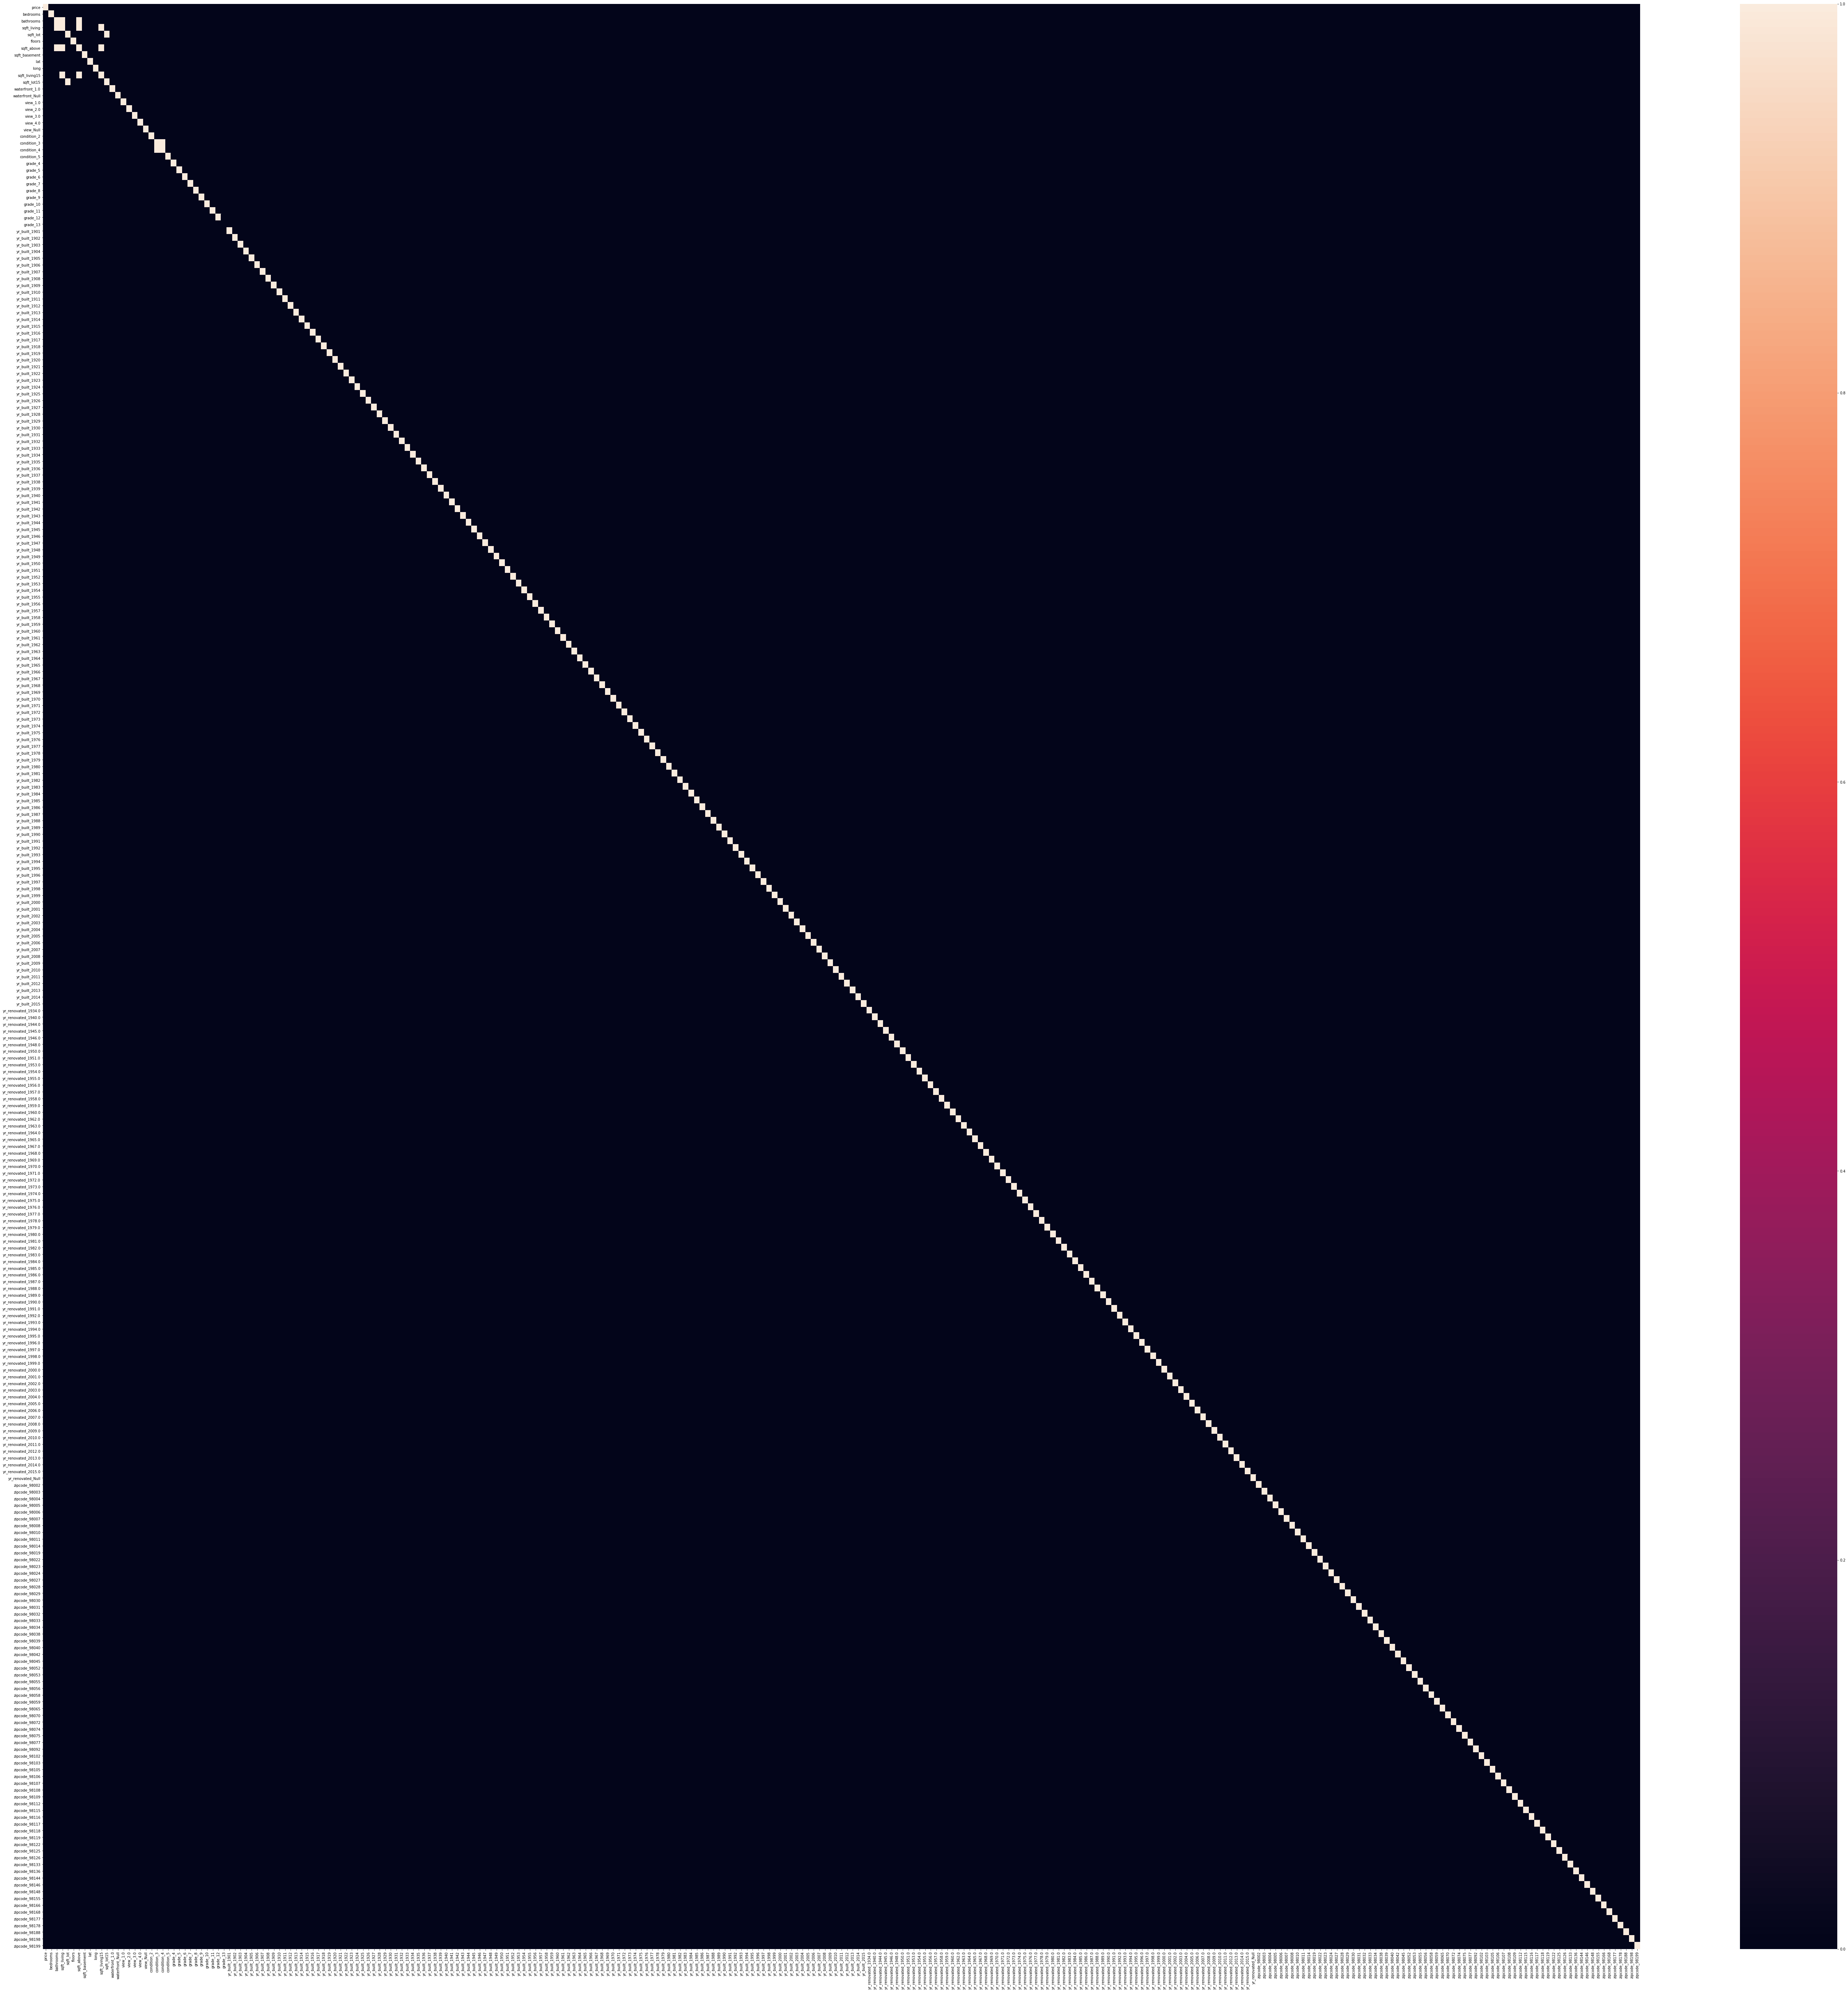

In [22]:
correlations = np.abs(dfFinal.corr())>.65
# display(correlations)
plt.figure(figsize=(100,100))
sns.heatmap(correlations.iloc[:, 0:])

This representaion isn't remotely useful for presentation but it does show that we are only concerned with the columns in top left corner. 

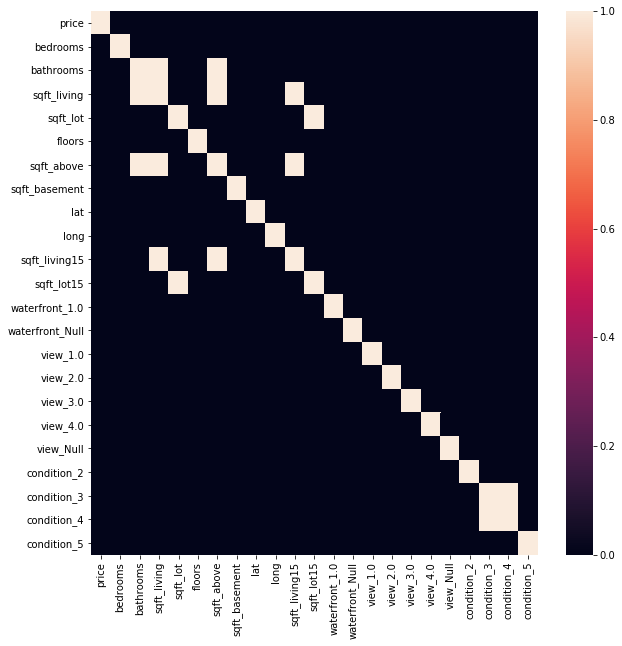

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations.iloc[:23, :23])

The heat map shows the following columns are redundant: Bathrooms, sqft_above, sqft_living15, sqft_lot15, condition_4

In [24]:
dfFinal.drop(labels = ['bathrooms', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'condition_4'], axis = 1, inplace = True)
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20033 entries, 0 to 21596
Columns: 282 entries, price to zipcode_98199
dtypes: float64(8), uint8(274)
memory usage: 6.6 MB


## Creating The Model

With all the data preped we move forward with creating out baseline model.

In [25]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
Y = dfFinal['price']
X = dfFinal.drop(labels = 'price', axis = 1)
X = sm.add_constant(X)
predictors = '+'.join(dfFinal.drop(labels = 'price', axis = 1).columns)
# formula = outcome + '~' + predictors
# display(formula)
model = sm.OLS(endog = Y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     468.4
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:46:51   Log-Likelihood:                -8057.9
No. Observations:               20033   AIC:                         1.668e+04
Df Residuals:                   19752   BIC:                         1.890e+04
Df Model:                         280                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1169      0.373      0.314      0.754      -0.614       0.848
bedrooms               -0.0061      0.004     -1.666      0.096      -0.013       0.001
sqft_living             0.3968      0.006     67.235      0.000       0.385       0.408
sqft_lot                0.1247      0.004     28.006      0.000       0.116       0.133
floors                 -0.0384      0.005     -8.328      0.000      -0.047      -0.029
sqft_basement          -0.0515      0.004    -13.407      0.000      -0.059      -0.044
lat                     0.1434      0.022      6.551      0.000       0.101       0.186
long                   -0.1134      0.019     -5.887      0.000      -0.151      -0.076
waterfront_1.0          0.8099      0.053     15.394      0.000       0.707       0.913
waterfront_Null        -0.0023      0.008     -0.275      0.784      -0.018       0.014
view_1.0                0.2855      0.022     12.831      0.000       0.242       0.329
view_2.0                0.2874      0.014     20.679      0.000       0.260       0.315
view_3.0                0.4382      0.020     21.752      0.000       0.399       0.478
view_4.0                0.6905      0.033     20.852      0.000       0.626       0.755
view_Null               0.0855      0.049      1.760      0.078      -0.010       0.181
condition_2            -0.3621      0.031    -11.865      0.000      -0.422      -0.302
condition_3            -0.1032      0.007    -14.994      0.000      -0.117      -0.090
condition_5             0.1375      0.011     12.841      0.000       0.117       0.159
grade_4                -1.2294      0.374     -3.286      0.001      -1.963      -0.496
grade_5                -1.3131      0.368     -3.566      0.000      -2.035      -0.591
grade_6                -1.1078      0.368     -3.013      0.003      -1.828      -0.387
grade_7                -0.8996      0.368     -2.446      0.014      -1.620      -0.179
grade_8                -0.6915      0.368     -1.880      0.060      -1.413       0.030
grade_9                -0.4497      0.368     -1.222      0.222      -1.171       0.272
grade_10               -0.2846      0.368     -0.773      0.440      -1.007       0.437
grade_11               -0.0647      0.369     -0.175      0.861      -0.789       0.659
grade_12                0.0191      0.425      0.045      0.964      -0.814       0.852
grade_13             1.354e-14   1.27e-14      1.063      0.288   -1.14e-14    3.85e-14
yr_built_1901          -0.2049      0.081     -2.527      0.012      -0.364      -0.046
yr_built_1902          -0.0691      0.083     -0.828      0.407      -0.233       0.094
yr_built_1903          -0.1510      0.068     -2.228      0.026      -0.284      -0.018
yr_built_1904          -0.0147      0.069     -0.215      0.830      -0.149       0.120
yr_

We now drop the columns with insignificant p-values. 

In [26]:
inSigPVal = list(model.pvalues.loc[model.pvalues.sort_values() > .05].index)
inSigPVal.remove('const')
dfModelAdjusted = dfFinal.copy()
dfModelAdjusted.drop(labels = inSigPVal, axis = 1, inplace = True)
dfModelAdjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20033 entries, 0 to 21596
Columns: 168 entries, price to zipcode_98199
dtypes: float64(7), uint8(161)
memory usage: 4.3 MB


In [27]:
Y = dfModelAdjusted['price']
X = dfModelAdjusted.drop(labels = 'price', axis = 1)
X = sm.add_constant(X)
predictors = '+'.join(dfModelAdjusted.drop(labels = 'price', axis = 1).columns)
# formula = outcome + '~' + predictors
# display(formula)
model = sm.OLS(endog = Y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     729.6
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:46:52   Log-Likelihood:                -8744.3
No. Observations:               20033   AIC:                         1.782e+04
Df Residuals:                   19865   BIC:                         1.915e+04
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6116      0.030    -20.413      0.000      -0.670      -0.553
sqft_living             0.4459      0.005     87.561      0.000       0.436       0.456
sqft_lot                0.1349      0.004     32.494      0.000       0.127       0.143
floors                 -0.0381      0.005     -8.428      0.000      -0.047      -0.029
sqft_basement          -0.0716      0.004    -18.421      0.000      -0.079      -0.064
lat                     0.1173      0.016      7.474      0.000       0.087       0.148
long                   -0.1181      0.018     -6.485      0.000      -0.154      -0.082
waterfront_1.0          0.7854      0.054     14.613      0.000       0.680       0.891
view_1.0                0.2970      0.023     13.020      0.000       0.252       0.342
view_2.0                0.3123      0.014     21.948      0.000       0.284       0.340
view_3.0                0.4987      0.020     24.345      0.000       0.459       0.539
view_4.0                0.7613      0.034     22.481      0.000       0.695       0.828
condition_2            -0.3533      0.031    -11.263      0.000      -0.415      -0.292
condition_3            -0.0879      0.007    -12.974      0.000      -0.101      -0.075
condition_5             0.1354      0.011     12.345      0.000       0.114       0.157
grade_4                -0.4827      0.075     -6.477      0.000      -0.629      -0.337
grade_5                -0.5908      0.028    -20.865      0.000      -0.646      -0.535
grade_6                -0.4112      0.013    -32.009      0.000      -0.436      -0.386
grade_7                -0.2409      0.007    -32.806      0.000      -0.255      -0.227
yr_built_1901          -0.2234      0.073     -3.060      0.002      -0.367      -0.080
yr_built_1903          -0.1469      0.057     -2.582      0.010      -0.258      -0.035
yr_built_1908          -0.1726      0.042     -4.117      0.000      -0.255      -0.090
yr_built_1942          -0.1086      0.027     -4.062      0.000      -0.161      -0.056
yr_built_1943          -0.1644      0.030     -5.437      0.000      -0.224      -0.105
yr_built_1944          -0.1227      0.033     -3.693      0.000      -0.188      -0.058
yr_built_1947          -0.1451      0.025     -5.840      0.000      -0.194      -0.096
yr_built_1948          -0.1272      0.026     -4.839      0.000      -0.179      -0.076
yr_built_1949          -0.0815      0.029     -2.848      0.004      -0.138      -0.025
yr_built_1950          -0.1403      0.025     -5.514      0.000      -0.190      -0.090
yr_built_1951          -0.1712      0.027     -6.457      0.000      -0.223      -0.119
yr_built_1952          -0.1518      0.027     -5.566      0.000      -0.205      -0.098
yr_built_1953          -0.1866      0.027     -6.910      0.000      -0.240      -0.134
yr_

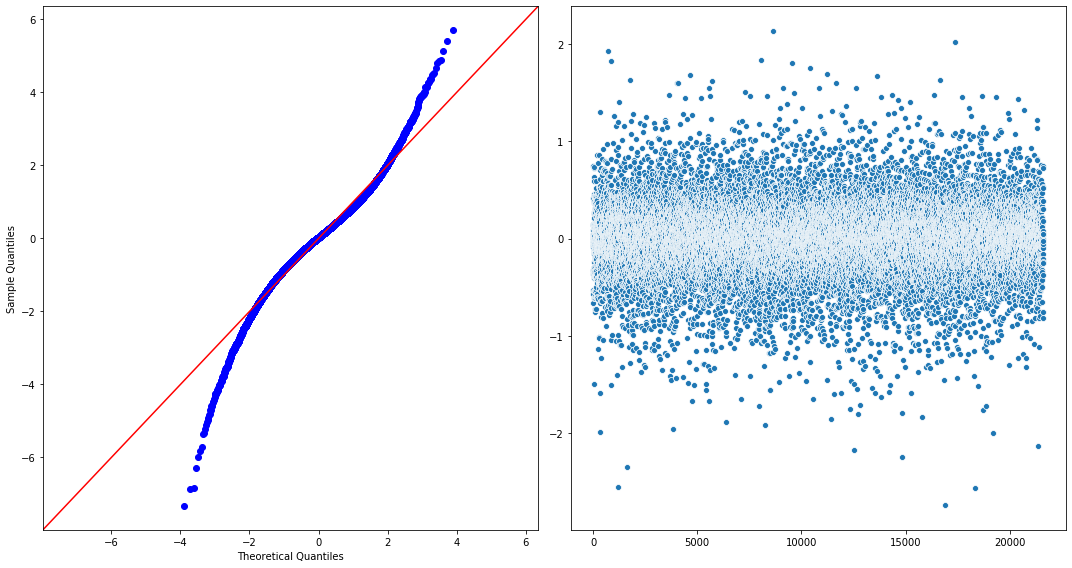

In [28]:
import scipy.stats as stats
residuals = model.resid
plt.figure(figsize=(15,8))
axes1 = plt.subplot(1,2,1)
axes2 = plt.subplot(1,2,2)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax = axes1)
sns.scatterplot(data = residuals, ax = axes2)
plt.tight_layout()
plt.show()

## Base Model Conclusions

As far as base models go, this was a great first attempt. With an adjusted R-squared value of 0.839. However, this number should be taken with a grain of salt considering we've failed the normal residuals assumption needed for an accurate linear regression. The following models will refine the data further to establish the assumptions.

# Improving The Baseline Model

Taking a close look at our baseline there are several points to pay attention to. In general it seems as though our approach of leaving all available information in the model has paid off rather significantly, no pun intended. Yet, with having rather questionably satisfied many of the assumptions for linear regression some additional constraints must be placed in order to have a mathematically sound model.  



## Treatment Of Outliers

Outliers have a disproportionate ability to affect models and are typically discarded prior to final analysis. I agrue that in terms of sale price, exceptionally low/high valued housed should not be considered outliers in the classical sense. An outlier by definition is a data point that represents an extraordinary break from the distribution of the caused by randomness. They are regarded as quantities that are hard or impossible to predict given a model that would predict the more standard data of a given set. For housing, such disregard for a home of extradinary value isn't in line with the true nature of an outlier because these values can be predicted when considering a proper subset of the original data set. Therefore, our first decision in compiling a refined version of the baseline is to spilt the data sets into three categories. Low sale price, middle sale price and high sale price. This is a tactical decision that is supported by our baseline modle residuals. The QQ plot above showcases piecewise linear residuals. Thus a linear regression should inherantly work, if we can find valid threshholds to seperate the data. To do this we return to the baseline model and find the values at which the slope of our residuals changes substantially. 

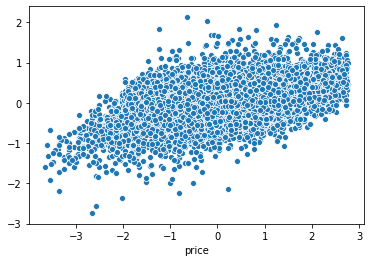

In [29]:
sns.scatterplot(x = dfModelAdjusted['price'], y = residuals.sort_values(ascending = True))

In [30]:
nonOutliers = residuals.loc[(residuals > residuals.quantile(.0035)) & (residuals < residuals.quantile(.9965))]


In [31]:
stats.ttest_ind(residuals, nonOutliers, equal_var = False)

Ttest_indResult(statistic=-0.1975540676808847, pvalue=0.8433949840111834)

,price,sqft_living,sqft_lot,floors,sqft_basement,lat,long,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_5,grade_4,grade_5,grade_6,grade_7,yr_built_1901,yr_built_1903,yr_built_1908,yr_built_1942,yr_built_1943,yr_built_1944,yr_built_1947,yr_built_1948,yr_built_1949,yr_built_1950,yr_built_1951,yr_built_1952,yr_built_1953,yr_built_1954,yr_built_1955,yr_built_1956,yr_built_1957,yr_built_1958,yr_built_1959,yr_built_1960,yr_built_1961,yr_built_1962,yr_built_1963,yr_built_1964,yr_built_1965,yr_built_1966,yr_built_1967,yr_built_1968,yr_built_1969,yr_built_1970,yr_built_1971,yr_built_1972,yr_built_1973,yr_built_1974,yr_built_1975,yr_built_1976,yr_built_1977,yr_built_1978,yr_built_1979,yr_built_1980,yr_built_1981,yr_built_1982,yr_built_1983,yr_built_1984,yr_built_1985,yr_built_1986,yr_built_1987,yr_built_1988,yr_built_1989,yr_built_1990,yr_built_1991,yr_built_1992,yr_built_1993,yr_built_1994,yr_built_1997,yr_built_2013,yr_built_2014,yr_renovated_1953.0,yr_renovated_1954.0,yr_renovated_1959.0,yr_renovated_1960.0,yr_renovated_1963.0,yr_renovated_1968.0,yr_renovated_1970.0,yr_renovated_1973.0,yr_renovated_1976.0,yr_renovated_1985.0,yr_renovated_1988.0,yr_renovated_1991.0,yr_renovated_1993.0,yr_renovated_1999.0,yr_renovated_2000.0,yr_renovated_2002.0,yr_renovated_2003.0,yr_renovated_2004.0,yr_renovated_2005.0,yr_renovated_2006.0,yr_renovated_2007.0,yr_renovated_2008.0,yr_renovated_2009.0,yr_renovated_2010.0,yr_renovated_2012.0,yr_renovated_2013.0,yr_renovated_2014.0,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-1.455154,-1.115599,-0.321467,-0.937310,-0.683685,-0.356922,-0.255659,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.414395,0.868366,0.005291,1.033973,0.333686,1.149064,-0.736722,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.896918,-2.203630,0.430040,-0.937310,-0.683685,1.270376,-0.069442,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.658668,0.177739,-0.482340,-0.937310,1.630834,-0.288011,-1.310893,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.301568

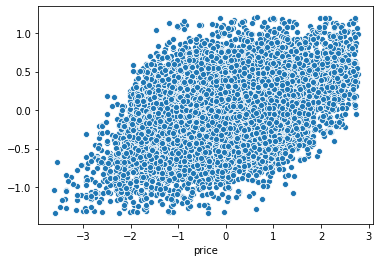

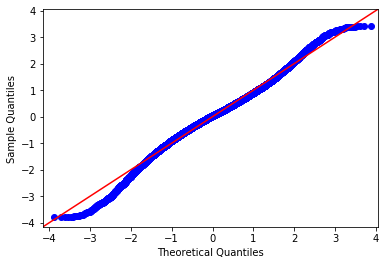

In [32]:
sns.scatterplot(x = dfModelAdjusted['price'], y = nonOutliers)
sm.graphics.qqplot(nonOutliers, dist=stats.norm, line='45', fit=True, )
normalResidualIndecies = list(nonOutliers.index)[:]
dfFinal2 = dfModelAdjusted.loc[normalResidualIndecies]
display(dfFinal2)


In [33]:
# display(dfFinal)
Y = dfFinal2['price']
X = dfFinal2.drop(labels = 'price', axis = 1)
X = sm.add_constant(X)
predictors = '+'.join(dfFinal2.drop(labels = 'price', axis = 1).columns)
# formula = outcome + '~' + predictors
# display(formula)
model2 = sm.OLS(endog = Y, exog = X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     822.6
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:46:54   Log-Likelihood:                -7408.5
No. Observations:               19891   AIC:                         1.515e+04
Df Residuals:                   19723   BIC:                         1.648e+04
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5925      0.028    -20.969      0.000      -0.648      -0.537
sqft_living             0.4516      0.005     93.844      0.000       0.442       0.461
sqft_lot                0.1344      0.004     34.259      0.000       0.127       0.142
floors                 -0.0419      0.004     -9.857      0.000      -0.050      -0.034
sqft_basement          -0.0768      0.004    -20.979      0.000      -0.084      -0.070
lat                     0.1231      0.015      8.322      0.000       0.094       0.152
long                   -0.0959      0.017     -5.594      0.000      -0.130      -0.062
waterfront_1.0          0.8957      0.051     17.431      0.000       0.795       0.996
view_1.0                0.2948      0.021     13.725      0.000       0.253       0.337
view_2.0                0.3094      0.013     23.097      0.000       0.283       0.336
view_3.0                0.4840      0.019     25.004      0.000       0.446       0.522
view_4.0                0.7461      0.032     23.306      0.000       0.683       0.809
condition_2            -0.3949      0.031    -12.904      0.000      -0.455      -0.335
condition_3            -0.0868      0.006    -13.613      0.000      -0.099      -0.074
condition_5             0.1332      0.010     12.928      0.000       0.113       0.153
grade_4                -0.6919      0.077     -8.983      0.000      -0.843      -0.541
grade_5                -0.6001      0.028    -21.737      0.000      -0.654      -0.546
grade_6                -0.4051      0.012    -33.410      0.000      -0.429      -0.381
grade_7                -0.2377      0.007    -34.428      0.000      -0.251      -0.224
yr_built_1901          -0.2277      0.068     -3.325      0.001      -0.362      -0.093
yr_built_1903          -0.1347      0.054     -2.472      0.013      -0.242      -0.028
yr_built_1908          -0.1733      0.041     -4.272      0.000      -0.253      -0.094
yr_built_1942          -0.0791      0.025     -3.115      0.002      -0.129      -0.029
yr_built_1943          -0.1679      0.029     -5.879      0.000      -0.224      -0.112
yr_built_1944          -0.1251      0.031     -4.013      0.000      -0.186      -0.064
yr_built_1947          -0.1379      0.024     -5.858      0.000      -0.184      -0.092
yr_built_1948          -0.1128      0.025     -4.555      0.000      -0.161      -0.064
yr_built_1949          -0.0710      0.027     -2.594      0.009      -0.125      -0.017
yr_built_1950          -0.1580      0.024     -6.580      0.000      -0.205      -0.111
yr_built_1951          -0.1709      0.025     -6.839      0.000      -0.220      -0.122
yr_built_1952          -0.1555      0.026     -6.075      0.000      -0.206      -0.105
yr_built_1953          -0.2087      0.025     -8.197      0.000      -0.259      -0.159
yr_

In [34]:
thing = list(model2.pvalues.loc[model2.pvalues > .05].index)
dfFinal3 = dfFinal2.drop(columns = thing)
dfFinal3
# normalResidualIndecies

,price,sqft_living,sqft_lot,floors,sqft_basement,lat,long,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_5,grade_4,grade_5,grade_6,grade_7,yr_built_1901,yr_built_1903,yr_built_1908,yr_built_1942,yr_built_1943,yr_built_1944,yr_built_1947,yr_built_1948,yr_built_1949,yr_built_1950,yr_built_1951,yr_built_1952,yr_built_1953,yr_built_1954,yr_built_1955,yr_built_1956,yr_built_1957,yr_built_1958,yr_built_1959,yr_built_1960,yr_built_1961,yr_built_1962,yr_built_1963,yr_built_1964,yr_built_1965,yr_built_1966,yr_built_1967,yr_built_1968,yr_built_1969,yr_built_1970,yr_built_1971,yr_built_1972,yr_built_1973,yr_built_1974,yr_built_1975,yr_built_1976,yr_built_1977,yr_built_1978,yr_built_1979,yr_built_1980,yr_built_1981,yr_built_1982,yr_built_1983,yr_built_1984,yr_built_1985,yr_built_1986,yr_built_1987,yr_built_1988,yr_built_1989,yr_built_1990,yr_built_1992,yr_built_1993,yr_built_1994,yr_built_1997,yr_built_2013,yr_built_2014,yr_renovated_1953.0,yr_renovated_1954.0,yr_renovated_1960.0,yr_renovated_1963.0,yr_renovated_1970.0,yr_renovated_1973.0,yr_renovated_1976.0,yr_renovated_1985.0,yr_renovated_1991.0,yr_renovated_1999.0,yr_renovated_2000.0,yr_renovated_2002.0,yr_renovated_2003.0,yr_renovated_2004.0,yr_renovated_2005.0,yr_renovated_2006.0,yr_renovated_2008.0,yr_renovated_2009.0,yr_renovated_2010.0,yr_renovated_2013.0,yr_renovated_2014.0,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-1.455154,-1.115599,-0.321467,-0.937310,-0.683685,-0.356922,-0.255659,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.414395,0.868366,0.005291,1.033973,0.333686,1.149064,-0.736722,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.896918,-2.203630,0.430040,-0.937310,-0.683685,1.270376,-0.069442,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.658668,0.177739,-0.482340,-0.937310,1.630834,-0.288011,-1.310893,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.301568,-0.215160,0.149417,-0.937310,-0.683685,0.401096,1.389264,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [35]:
Y = dfFinal3['price']
X = dfFinal3.drop(labels = 'price', axis = 1)
X = sm.add_constant(X)
predictors = '+'.join(dfFinal3.drop(labels = 'price', axis = 1).columns)
# formula = outcome + '~' + predictors
# display(formula)
model3 = sm.OLS(endog = Y, exog = X).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     857.7
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:46:54   Log-Likelihood:                -7420.1
No. Observations:               19891   AIC:                         1.516e+04
Df Residuals:                   19730   BIC:                         1.643e+04
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5949      0.028    -21.053      0.000      -0.650      -0.540
sqft_living             0.4519      0.005     93.923      0.000       0.442       0.461
sqft_lot                0.1339      0.004     34.247      0.000       0.126       0.142
floors                 -0.0417      0.004     -9.817      0.000      -0.050      -0.033
sqft_basement          -0.0767      0.004    -20.963      0.000      -0.084      -0.070
lat                     0.1225      0.015      8.284      0.000       0.094       0.152
long                   -0.0958      0.017     -5.586      0.000      -0.129      -0.062
waterfront_1.0          0.9037      0.051     17.603      0.000       0.803       1.004
view_1.0                0.2939      0.021     13.679      0.000       0.252       0.336
view_2.0                0.3096      0.013     23.122      0.000       0.283       0.336
view_3.0                0.4852      0.019     25.065      0.000       0.447       0.523
view_4.0                0.7438      0.032     23.232      0.000       0.681       0.807
condition_2            -0.3968      0.031    -12.968      0.000      -0.457      -0.337
condition_3            -0.0864      0.006    -13.544      0.000      -0.099      -0.074
condition_5             0.1333      0.010     12.927      0.000       0.113       0.153
grade_4                -0.6896      0.077     -8.950      0.000      -0.841      -0.539
grade_5                -0.5975      0.028    -21.651      0.000      -0.652      -0.543
grade_6                -0.4041      0.012    -33.343      0.000      -0.428      -0.380
grade_7                -0.2374      0.007    -34.400      0.000      -0.251      -0.224
yr_built_1901          -0.2278      0.069     -3.324      0.001      -0.362      -0.093
yr_built_1903          -0.1344      0.055     -2.466      0.014      -0.241      -0.028
yr_built_1908          -0.1706      0.041     -4.206      0.000      -0.250      -0.091
yr_built_1942          -0.0781      0.025     -3.080      0.002      -0.128      -0.028
yr_built_1943          -0.1661      0.029     -5.816      0.000      -0.222      -0.110
yr_built_1944          -0.1230      0.031     -3.944      0.000      -0.184      -0.062
yr_built_1947          -0.1351      0.024     -5.738      0.000      -0.181      -0.089
yr_built_1948          -0.1099      0.025     -4.438      0.000      -0.158      -0.061
yr_built_1949          -0.0684      0.027     -2.502      0.012      -0.122      -0.015
yr_built_1950          -0.1560      0.024     -6.501      0.000      -0.203      -0.109
yr_built_1951          -0.1688      0.025     -6.758      0.000      -0.218      -0.120
yr_built_1952          -0.1541      0.026     -6.019      0.000      -0.204      -0.104
yr_built_1953          -0.2066      0.025     -8.116      0.000      -0.257      -0.157
yr_

In [36]:
# X = dfFinal3.drop(labels = 'price', axis = 1)
# y = dfFinal3['price']
# finalCols = stepwise_selection(X = X, y = y,verbose = True)

In [37]:
# len(finalCols)
# "','".join(finalCols)
# finalCols = [lat,sqft_living,zipcode_98004,view_4.0,zipcode_98040,zipcode_98112,view_3.0,zipcode_98155,zipcode_98133,zipcode_98028,zipcode_98019,view_2.0,zipcode_98039,zipcode_98011,zipcode_98168,zipcode_98178,sqft_lot,zipcode_98014,zipcode_98022,zipcode_98052,grade_7,grade_6,waterfront_1.0,grade_5,condition_5,zipcode_98119,zipcode_98006,zipcode_98116,zipcode_98136,zipcode_98109,zipcode_98102,zipcode_98122,zipcode_98105,sqft_basement,zipcode_98199,bedrooms,view_1.0,zipcode_98144,yr_built_2014,zipcode_98106,grade_13,zipcode_98056,zipcode_98010,condition_2,condition_3,zipcode_98027,zipcode_98005,zipcode_98107,zipcode_98029,zipcode_98103,zipcode_98126,zipcode_98038,yr_built_2013,zipcode_98092,yr_built_2012,zipcode_98075,yr_built_1978,yr_built_1979,yr_renovated_2014.0,yr_built_1966,yr_built_1962,yr_built_1959,yr_built_1977,yr_built_1954,yr_built_1955,yr_built_1960,yr_built_1965,yr_renovated_2010.0,yr_built_1967,zipcode_98008,zipcode_98115,zipcode_98033,zipcode_98117,zipcode_98007,zipcode_98118,zipcode_98074,zipcode_98059,zipcode_98065,zipcode_98166,zipcode_98053,zipcode_98045,long,zipcode_98024,yr_built_1957,yr_built_1961,yr_built_1964,yr_built_1980,yr_renovated_2009.0,yr_renovated_2013.0,yr_built_1958,yr_built_1963,yr_built_1973,yr_built_1976,yr_built_1968,yr_built_1970,grade_4,yr_built_1987,yr_renovated_2008.0,yr_renovated_2002.0,yr_built_1975,yr_built_1956,yr_built_1969,yr_built_1974,yr_built_1972,yr_built_1953,floors,yr_built_1971,zipcode_98034,yr_built_1984,yr_renovated_1963.0,yr_built_1986,yr_built_1982,yr_built_1951,yr_built_1947,yr_built_1952,yr_built_1948,yr_built_1988,yr_built_1981,yr_built_1985,yr_built_1908,yr_built_1943,yr_built_1950,yr_built_1983,yr_renovated_2005.0,zipcode_98058,zipcode_98042,zipcode_98125,zipcode_98108,zipcode_98177,yr_renovated_1970.0,yr_built_1901,yr_built_1990,yr_built_1989,yr_renovated_2004.0,view_Null,yr_renovated_1960.0,yr_built_1944,yr_built_1942,yr_built_1994,yr_renovated_2003.0,yr_built_1949,yr_built_1946,yr_built_1992,yr_renovated_1994.0,yr_renovated_1976.0,yr_renovated_2006.0,yr_built_1997,yr_built_1903,yr_renovated_1999.0]

In [38]:
# Y = dfFinal3['price']
# X = dfFinal3.drop(labels = 'price', axis = 1)[finalCols]
# X = sm.add_constant(X)
# model4 = sm.OLS(endog = Y, exog = X).fit()
# model4.summary()

## Coefficient Analysis

Our selection process has brought us this far

In [44]:
finalModel, excludedCols = scripts.removeFeatures(dfFinal3, features = [x for x in dfFinal3.drop(columns = 'price').columns], target = 'price', RThreshold = .83, pThreshold = .05)

 The starting R-value for the model is 0.874301803055865


floors was removed with a coefficient of 0.041743223755147094

The following columns have p-values above the threshold of 0.05: ['yr_built_1949']

zipcode_98023 was removed with a coefficient of 0.04965915046354948

The following columns have p-values above the threshold of 0.05: ['yr_renovated_1991.0']

sqft_basement was removed with a coefficient of 0.06016054238060518

The following columns have p-values above the threshold of 0.05: ['yr_built_1903', 'yr_built_1997', 'yr_renovated_1954.0']

long was removed with a coefficient of 0.06977265194091375

The following columns have p-values above the threshold of 0.05: ['zipcode_98030', 'zipcode_98092']

zipcode_98022 was removed with a coefficient of 0.06632411357913134

zipcode_98188 was removed with a coefficient of 0.07448406372480847

zipcode_98042 was removed with a coefficient of 0.06949883011515016

zipcode_98031 was removed with a coefficient of 0.06183889101308008

zipco


The R-squared value has dropped to 0.8250507114076795 which is below the acceptable threshold of 0.83. Adding feature: zipcode_98056 back into the model and continuing 



zipcode_98166 was removed with a coefficient of 0.5830921167357804

The R-squared value has dropped to 0.8269057414583525 which is below the acceptable threshold of 0.83. Adding feature: zipcode_98166 back into the model and continuing 



zipcode_98059 was removed with a coefficient of 0.6226681519097745

The R-squared value has dropped to 0.8229315425447488 which is below the acceptable threshold of 0.83. Adding feature: zipcode_98059 back into the model and continuing 



zipcode_98070 was removed with a coefficient of 0.6323777401633341

The R-squared value has dropped to 0.8294398899540508 which is below the acceptable threshold of 0.83. Adding feature: zipcode_98070 back into the model and continuing 



zipcode_98014 was removed with a coefficient of 0.6341920777903853

The R-squared value has dropped to 0.82

The R-squared value has dropped to 0.7685643730444938 which is below the acceptable threshold of 0.83. Adding feature: zipcode_98117 back into the model and continuing 



zipcode_98103 was removed with a coefficient of 1.589988003055886

The R-squared value has dropped to 0.7622683741924263 which is below the acceptable threshold of 0.83. Adding feature: zipcode_98103 back into the model and continuing 



zipcode_98122 was removed with a coefficient of 1.6082093807344096

The R-squared value has dropped to 0.7957185790372343 which is below the acceptable threshold of 0.83. Adding feature: zipcode_98122 back into the model and continuing 



zipcode_98005 was removed with a coefficient of 1.6135059462660453

The R-squared value has dropped to 0.8114397528756703 which is below the acceptable threshold of 0.83. Adding feature: zipcode_98005 back into the model and continuing 



zipcode_98033 was removed with a coefficient of 1.6216930913554235

The R-squared value has dropped to 0.7806

In [45]:
finalModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1799.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:48:29   Log-Likelihood:                -10399.
No. Observations:               19891   AIC:                         2.091e+04
Df Residuals:                   19836   BIC:                         2.134e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9023      0.006   -159.845      0.000      -0.913      -0.891
zipcode_98146      0.4043      0.025     16.027      0.000       0.355       0.454
view_3.0           0.4466      0.022     20.253      0.000       0.403       0.490
zipcode_98106      0.5188      0.023     22.283      0.000       0.473       0.564
zipcode_98108      0.5200      0.031     16.737      0.000       0.459       0.581
zipcode_98019      0.5339      0.033     16.411      0.000       0.470       0.598
sqft_living        0.5481      0.003    171.095      0.000       0.542       0.554
zipcode_98056      0.5527      0.021     25.984      0.000       0.511       0.594
zipcode_98166      0.5817      0.027     21.429      0.000       0.528       0.635
zipcode_98059      0.6212      0.020     30.363      0.000       0.581       0.661
zipcode_98070      0.6197      0.049     12.617      0.000       0.523       0.716
zipcode_98014      0.6329      0.048     13.139      0.000       0.538       0.727
view_4.0           0.7293      0.037     19.837      0.000       0.657       0.801
zipcode_98065      0.7498      0.025     29.425      0.000       0.700       0.800
zipcode_98028      0.7583      0.025     30.076      0.000       0.709       0.808
zipcode_98155      0.7626      0.020     37.257      0.000       0.723       0.803
zipcode_98024      0.7784      0.059     13.135      0.000       0.662       0.895
zipcode_98118      0.7867      0.020     40.268      0.000       0.748       0.825
zipcode_98133      0.8166      0.019     42.021      0.000       0.779       0.855
zipcode_98011      0.8318      0.030     27.598      0.000       0.773       0.891
waterfront_1.0     0.9752      0.059     16.526      0.000       0.860       1.091
zipcode_98034      0.9878      0.019     52.718      0.000       0.951       1.025
zipcode_98125      1.0098      0.021     47.371      0.000       0.968       1.052
zipcode_98072      1.0108      0.026     38.570      0.000       0.959       1.062
zipcode_98126      1.0256      0.023     45.347      0.000       0.981       1.070
zipcode_98027      1.0900      0.022     48.610      0.000       1.046       1.134
zipcode_98077      1.1191      0.033     34.193      0.000       1.055       1.183
zipcode_98177      1.1633      0.027     42.382      0.000       1.110       1.217
zipcode_98074      1.2126      0.021     57.469      0.000       1.171       1.254
zipcode_98053      1.2328      0.023     53.578      0.000       1.188       1.278
zipcode_98029      1.2351      0.024     51.687      0.000       1.188       1.282
zipcode_98144      1.2446      0.023     52.989      0.000       1.199       1.291
zipcode_98008      1.2774      0.025     50.136      0.000       1.227       1.327
zipcode_98075      1.2899      0.024     53.846      0.000       1.243       1.337
zipcode_9805

In [43]:
excludedCols

['floors',
 'yr_built_1949',
 'zipcode_98023',
 'yr_renovated_1991.0',
 'sqft_basement',
 'yr_built_1903',
 'yr_built_1997',
 'yr_renovated_1954.0',
 'long',
 'zipcode_98030',
 'zipcode_98092',
 'zipcode_98022',
 'zipcode_98188',
 'zipcode_98042',
 'zipcode_98031',
 'zipcode_98178',
 'zipcode_98198',
 'yr_built_1993',
 'yr_built_1990',
 'yr_built_1994',
 'yr_built_1989',
 'yr_built_1992',
 'yr_built_1942',
 'condition_3',
 'yr_renovated_2000.0',
 'yr_renovated_2006.0',
 'yr_built_1948',
 'yr_built_1988',
 'yr_built_1944',
 'yr_built_1986',
 'yr_built_1985',
 'yr_built_1983',
 'yr_built_1987',
 'yr_built_1947',
 'yr_built_1952',
 'yr_built_1984',
 'yr_built_1950',
 'yr_built_1981',
 'yr_built_1951',
 'yr_built_1908',
 'yr_built_1943',
 'yr_built_1953',
 'yr_built_1956',
 'yr_built_1954',
 'sqft_lot',
 'yr_built_1901',
 'yr_renovated_1973.0',
 'yr_built_1980',
 'yr_built_1968',
 'yr_built_1973',
 'yr_built_1971',
 'yr_built_1958',
 'yr_built_1974',
 'yr_built_1967',
 'yr_built_1964',
 'y